## Ausbreitung von Information in sozialen Netzwerken

Die Ausbreitung von Information in sozialen Netzwerken kann mit Instrumenten der Netzwekranalyse untersucht werden. Sie Struktur eines Netzwerks spielt dabei eine wesentliche Rolle. Richard Dawkins hat in seinem Buch <it>The selfish Gene</it> den Begriff des Mems geprägt. Ein Mem ist dabei in Analogie zum biologischen Gen eine Repräsentation eines Bewusstseininhalts (etwa einer Idee). Eine derartige Idee kann sich verbreiten und dabei weiterentwickeln und verändern. Das Internetphänomen - auch als virales Phänomen bezeichnet und dann ggf. auch nicht über das Internet sondern z.B. mündlich verbreitete Information - ist ein sich schnell verbreitetende Nachricht, Videoclip,...

Ein berühmtes Beispiel ist der "You can still dunk in the dark"-Tweet (siehe https://twitter.com/oreo/status/298246571718483968?lang=de) während eines BlackOuts im SuperBowl Endspiel 2013, der in kürzester Zeit zu einer enormen Anzahl an Retweets geführt hat (10.000 in einer Stunde!).  

Schauen wir zunächst auf Modelle aus der Epidemiologie, die die Ausbreitung ansteckender Krankheiten mathematisch beschrieben. Die Ausbreitung eines Gedankens bzw. einer Idee kann in ähnlicher Weise untersucht werden. Die klassischen Modelle basieren auf Differentialgleichungen, die mit Parametern angepasst werden können.   

Das SI-Modell (S=Susceptible Individuals, I=Infectious Individuals) ist das einfachste einer Reihe ähnlicher Ansätze. $S$ bezeichnet die Anzahl der gesunden Individuen und $I$ die der bereits infizierten. Wir nehmen an, dass $N=S+I$ gilt. Die Geschwindigkeit der Ausbreitung hängt von der Anzahl der erkrankten und der gesunden Individuen und wir durch einen konstanten Faktor $c$ bestimmt. Es gilt dann:
+ $\frac{dS}{dt}=-c\cdot I \cdot S$
+ $\frac{dI}{dt}=c\cdot I \cdot S$

Nutzt man die Erhaltungsgleichung $N=S+I$ und setzt dies ein, so erhält man $\frac{dI}{dt}=c \cdot I \cdot (N-I)=c \cdot I \cdot N \cdot (1-\frac{I}{N})=c' \cdot I \cdot (1-\frac{I}{N})$.

Das ist die <it>Logistische Differentialgleichung</it>, die logostisches Wachstum beschreibt. Die Infizierten breiten sich auf die gesamte Population aus.

Wir diskretisieren die Differentialgleichungen und erhalten damit im Prinzip Differenzengleichungen. Für die umgestellte Gleichung: $i_{t+1}=i_t+c\cdot i_{t}\cdot (1-\frac{i_t}{n})$

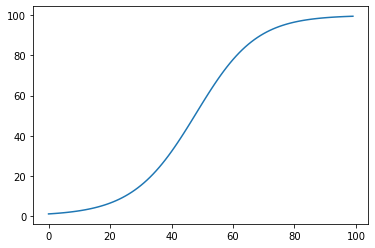

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
c=0.1
i=[1]
s=[99]
n=i[0]+s[0]
for t in range(1,100):
    i.append(i[t-1]+c*i[t-1]*(1-i[t-1]/n))
plt.plot(i)
plt.show()

Das SI-Modell beschriebt alleine die Ausbreitung ohne Berückssichtigung von Effekten der Gesundung. Das SIS-Modell lässt dies zu und stellt dies in leicht modifizierten Gleichungen dar (N ist wieder konstant und $N=S+I$):

+ $\frac{dS}{dt}=-c\cdot I \cdot S + w \cdot I$
+ $\frac{dI}{dt}=c\cdot I \cdot S - w \cdot I$

Die Konstante c beschreibt die Geschwindigkeit der Ausbreitung, w die der Gesundung.

Im SIR-Modell (R steht für Recovered oder Removed) kann dazu noch eine Immunitätsbildung beschrieben werden. Hier wir die dritte Größe R in einer weiteren Gleichung beschrieben und es gilt $N=S+I+R$.

+ $\frac{dS}{dt}=-c\cdot I \cdot S$
+ $\frac{dI}{dt}=c \cdot S\cdot I  - w \cdot I$
+ $\frac{dR}{dt}=w \cdot I$

Wie zuvor fassen wir die Gleichungen wieder als Differenzengleichungen auf und erhalten folgende Lösungen:

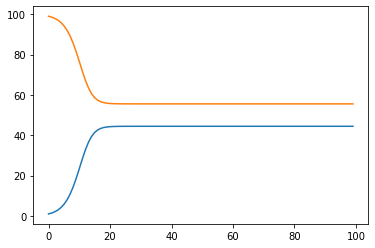

In [9]:
def sisModell(c,w,n):
    i=[1]
    s=[n-i[0]]
    for t in range(1,100):
        s.append(s[t-1]-c*i[t-1]*s[t-1]+w*i[t-1])
        i.append(i[t-1]+c*i[t-1]*s[t-1]-w*i[t-1])
    return [i,s]

x=sisModell(0.0099,0.15,100)
plt.plot(x[0])
plt.plot(x[1])
plt.show()    

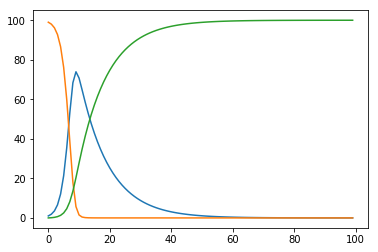

In [3]:
def sirModell(c,w,n):
    i=[1]
    r=[0]
    s=[n-i[0]]
    for t in range(1,100):
        s.append(s[t-1]-c*i[t-1]*s[t-1])
        i.append(i[t-1]+c*s[t-1]*i[t-1]-w*i[t-1])
        r.append(r[t-1]+w*i[t-1])
    return [i,s,r]

x=sirModell(0.01,0.1,100)
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show() 

Die SI<x>-Modelle berücksichtigen die Struktur der untersuchten Gesellschaft nur in geringem Maße und gehen von einer homogenen Ausbreitung aus. Stellgrößen sind nur die Parameter c und w. 

In einer Gesellschaft spielt die Topologie der Vernetzung eine entscheidende Rolle bei der Ausbreitung von Informationspartikeln (Anmerkung: Auch bei der Ausbreitung von Krankheiten). Bildet man Individuen auf Knoten eines Graphen und deren Sozialkontakte zu anderen Knoten auf die Kanten desselben ab, so erhält man Modell, das wesentlich mehr Parameter und damit mehr Stellschrauben enthält. 

So können einzelne Knoten mit einer Idee identifiziert werden und diese dann über die Kanten des Graphen in die gesamte Gesellschaft diffundieren. Dafür unterstellen wir Wahrscheinlichkeiten dafür, dass eine Kante einen weiteren Knoten aktiviert. Diese Wahrscheinlichkeiten können zum Beispiel aus Eigenschaften der Knoten abgeleitet werden. Ein Maß könnte zum Beispiel der Pagerank sein, da er die Zentralität eines Knoten quantifiziert.   

Das beschriebene Modell wird als <b>Independant Cascasde Modell</b> (kurz: ICM) bezeichnet (siehe Kempe, Kleinberg, Tardos: Maximizing the Spread of Influence through a Social Network, https://www.cs.cornell.edu/home/kleinber/kdd03-inf.pdf ). 

In [21]:
import networkx as nx
import random
import matplotlib as plt
%matplotlib inline

def drawLattice(g):
    pos = dict( (n, n) for n in g.nodes() )
    color_map=[]
    for node in g.nodes(data=True):
        if node[1]['activation']==0:
            color_map.append('red')
        else:
            color_map.append('green')
    nx.draw(g, pos=pos, node_color = color_map, labels=pos)    

def drawGraph(g):
    color_map=[]
    for node in g.nodes(data=True):
        if node[1]['activation']==0:
            color_map.append('red')
        else:
            color_map.append('green')
    nx.draw(g, node_color = color_map)    

# in function because of future extensions
def getProbability(g,prob,v,w):
    return prob


def activate(g,w,status):
    ww={w : 1}
    status.update(ww)
    nx.set_node_attributes(g, status, 'activation')
    

def independantCascadeModel(g,initialNodes,maxrounds=99999,prob=0.5):
    status={}
    for v in g.nodes:
        if v in initialNodes:
            w={v : 1}
        else:
            w={v : 0}
        status.update(w)
    nx.set_node_attributes(g, status, 'activation')
    i=0;
    a=[]
    # ist das wirklich richtig?
    a_all=initialNodes.copy()
    a.append(initialNodes);
    while a[i]:
        anew=[]
        for v in a[i]:
            for w in nx.neighbors(g,v):
                if w not in a_all:
                    p=random.random()
                    if p<=getProbability(g,prob,v,w):
                        activate(g,w,status)
                        anew.append(w)
                        a_all.append(w)
        i+=1
        a.append(anew)
        if i>maxrounds:
            return a
    return a;

[(0, 0)]
[[(0, 0)], [(1, 0)], [(1, 1), (2, 0)], [(0, 1), (2, 1), (3, 0)], [(0, 2), (3, 1), (4, 0)], [(0, 3), (1, 2), (3, 2), (4, 1), (5, 0)], [(1, 3), (2, 2), (4, 2), (5, 1), (6, 0)], [(1, 4), (2, 3), (4, 3), (5, 2), (6, 1), (7, 0)], [(0, 4), (1, 5), (2, 4), (3, 3), (4, 4), (5, 3), (6, 2), (7, 1), (8, 0)], [(1, 6), (2, 5), (3, 4), (5, 4), (6, 3), (7, 2), (8, 1), (9, 0)], [(0, 6), (1, 7), (2, 6), (3, 5), (5, 5), (6, 4), (7, 3), (8, 2)], [(0, 5), (0, 7), (1, 8), (2, 7), (3, 6), (4, 5), (5, 6), (6, 5), (7, 4), (8, 3), (9, 2)], [(0, 8), (1, 9), (2, 8), (3, 7), (4, 6), (6, 6), (7, 5), (8, 4), (9, 3), (9, 1)], [(0, 9), (2, 9), (3, 8), (4, 7), (6, 7), (8, 5), (9, 4)], [(3, 9), (4, 8), (5, 7), (6, 8), (7, 7), (9, 5)], [(4, 9), (5, 8), (6, 9), (7, 8), (7, 6), (8, 7), (9, 6)], [(5, 9), (7, 9), (8, 8), (8, 6), (9, 7)], [(8, 9), (9, 8)], [(9, 9)], []]


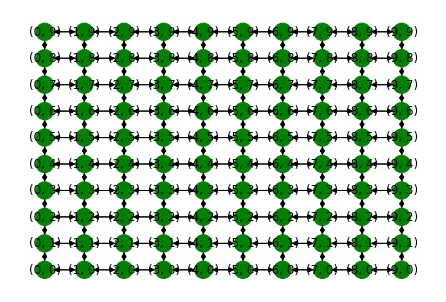

In [2]:
g=nx.grid_2d_graph(10, 10, periodic=False, create_using=nx.DiGraph())
initialNodes=[list(g.nodes())[0]]
print(initialNodes)
res=independantCascadeModel(g,initialNodes,maxrounds=9999,prob=0.8)
drawLattice(g)
print(res)

Knoten, die erreicht werden (Nachbar trägt Information und gibt sie weiter) erhalten den Status <it>aktiviert</it>, der in der Daten der Knoten abgespeichert wird. Dies erfolgt über ein Dictionary und die networkx Funktion set_node_attributes. Der Parameter </it>maxrounds</it> beendet den Algorithmus und erlaubt damit einen Abbruch zum Zwecke der Visualisierung des Graphen. Der Rückgabewert der Funktion <it>independantCascadeModel</it> ist ein Vektor von Vektoren, die die neu erreichten Knoten enthalten. Damit kann die Geschwindigkeit der Ausbreitung visualisiert werden. Plotted man die Kurve für einen $20\times20$-Lattice Graphen und setzt p=1, so erkennen wir wieder die Kurve aus dem SI-Modell. 

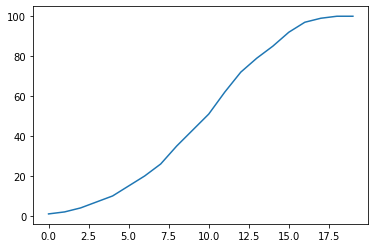

In [3]:
import matplotlib.pyplot as plt

def showDiffusion(v):
    result=[]
    for i in range(len(v)):
        if i==0:
            result.append(len(v[0]))
        else:
            result.append(result[i-1]+len(v[i]))
    plt.plot(result)        
    plt.show()

showDiffusion(res)

[0, 1, 3]
18
1
20


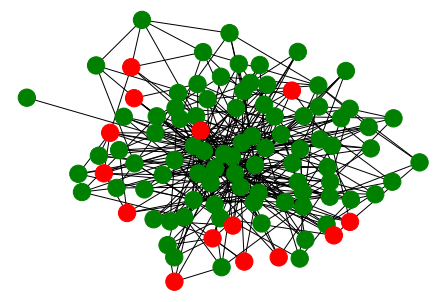

In [28]:
g2=nx.barabasi_albert_graph(100, 4, seed=0)
initialNodes=[list(g2.nodes())[0],list(g2.nodes())[1],list(g2.nodes())[3]]
print(initialNodes)
for i in initialNodes:
    print(nx.degree(g2,i))
res2=independantCascadeModel(g2,initialNodes,maxrounds=99999,prob=0.3)
drawGraph(g2)

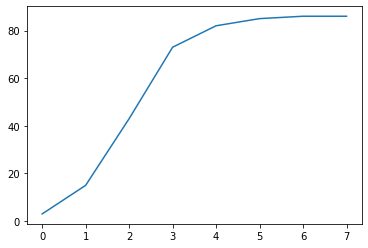

In [29]:
showDiffusion(res2)

Auch bei Anwendung auf einen Barabasi-Albert-Graphen wird die Analogie zum SI-Modell sichtbar. Wählt man stark vernetzte Knoten als Startknoten, so verbreitet sich die Information deutlich schneller. 

In [4]:
def getHubs(g,n):
    hubs=[]
    for v in g.nodes():
        if len(list(nx.neighbors(g,v)))>=n:
            hubs.append(v)
    return hubs

In [52]:
print(getHubs(g2,30))

[7]


[5, 6]


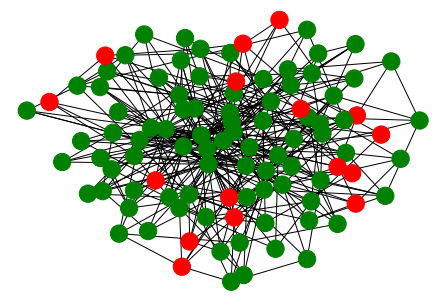

In [53]:
pag=nx.barabasi_albert_graph(100, 4, seed=None)
initialNodes=getHubs(pag,30)
print(initialNodes)
respag=independantCascadeModel(pag,initialNodes,maxrounds=99999,prob=0.3)
drawGraph(pag)

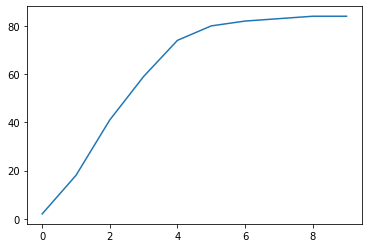

In [54]:
showDiffusion(respag)

Der Pagerank ist ein mögliches Maß für die nähere Spezifizierung der Wahrscheinlichkeit, dass ein Knoten einen anderen Knoten überzeugt.
Dafür wird der Pagerank-Vektor für den Graphen bestimmt, in einem Dictionary gespeichert und als Attribut an die Knoten geschrieben.

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def rowSum(m, row):
    total = 0
    for col in range(len(m[row])):
        total += m[row][col]
    return total


def pagerank(g,v):
    alpha=0.85
    n=len(v)    
    m=nx.to_numpy_array(g)
    for i in range (len(m)):
        t=rowSum(m,i)
        if t!=0:
            m[i]=m[i]/t        
    a=np.transpose(m)
    one=[]
    for i in range(len(v)):
        one.append(1)
    for i in range(100):
        v2=[(1-alpha)/n * i for i in one]+alpha*a@v
        v=v2
    return v

def addPagerank(g):
    sv=[1]
    for i in range(len(g.nodes)-1):
        sv.append(0)
    pr=pagerank(g,sv)
    prd={}
    for v,r in zip(list(g.nodes),pr):
        w={v : r}
        prd.update(w)
    nx.set_node_attributes(g,prd,'pagerank')

In [9]:
pag=nx.barabasi_albert_graph(100, 4, seed=None)
addPagerank(pag)
print(pag.nodes(data=True))

[(0, {'pagerank': 0.02380561510333849}), (1, {'pagerank': 0.021797921632329326}), (2, {'pagerank': 0.020128191749968827}), (3, {'pagerank': 0.02040875270976661}), (4, {'pagerank': 0.03279920865558782}), (5, {'pagerank': 0.04037655697436478}), (6, {'pagerank': 0.012389024498638717}), (7, {'pagerank': 0.026056804998036767}), (8, {'pagerank': 0.01688740800018724}), (9, {'pagerank': 0.013305310265815403}), (10, {'pagerank': 0.01429012273491793}), (11, {'pagerank': 0.01459406249938273}), (12, {'pagerank': 0.019902223529363956}), (13, {'pagerank': 0.007892491791313131}), (14, {'pagerank': 0.007935670491565449}), (15, {'pagerank': 0.018912673270412985}), (16, {'pagerank': 0.013432360701417938}), (17, {'pagerank': 0.008998387828699826}), (18, {'pagerank': 0.02136555788018351}), (19, {'pagerank': 0.010470355451731642}), (20, {'pagerank': 0.010322515705311104}), (21, {'pagerank': 0.013748561225307371}), (22, {'pagerank': 0.006648099254932644}), (23, {'pagerank': 0.009118569503940757}), (24, {'pa

0.02328968060454435
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 65, 67, 69, 70, 74, 76, 79, 80, 82, 83, 84, 87, 88, 89, 94, 96]


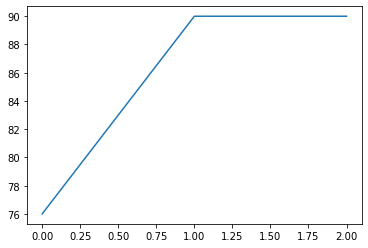

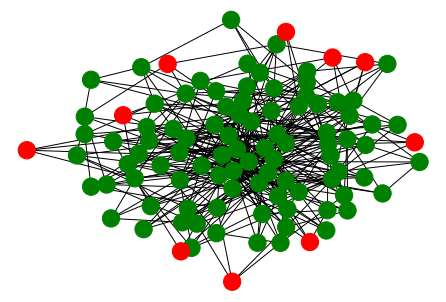

In [10]:
def getProbability(g,prob,v,w):
    node=list(g.nodes(data=True))
    return node[v][1]['pagerank']*len(list(nx.neighbors(g,v)))

import matplotlib.pyplot as plt
print(getProbability(pag,0.5,list(pag.nodes())[99],list(pag.nodes())[1]))
initialNodes=getHubs(pag,5)

print(initialNodes)
res=independantCascadeModel(pag,initialNodes,maxrounds=99999,prob=0.7)
showDiffusion(res)
drawGraph(pag)

In [11]:
def maxPagerank(g):
    node=list(g.nodes(data=True))
    res=[]
    for i in g.nodes:
        res.append(node[i][1]['pagerank'])
    return max(res)
        

hubs=getHubs(pag,36)
node=list(pag.nodes(data=True))
for v in hubs:
    print(node[v][1]['pagerank'])
print("maxPagerank",maxPagerank(pag))    




maxPagerank 0.04037655697436478


Eine interessante Frage: Für welche Auswahl an Startknoten ist die Informationsausbreitung optimial? Die Suche nach der optimalen Startmenge ist NP-hart. Das Problem wird als <b>influence maximization problem</b> (IMP) bezeichnet.

Für eine intiale Knotenmenge S sei $\sigma(S)$ die Anzahl der schließlich zum Ende aktivierten Knoten. Da im schlimmsten Falle einfach keine Knoten aktiviert werden, gilt $\sigma(S)\geq0$. Außerdem ist die Funktion monoton: $\sigma(S\cup \{v\})\geq \sigma(S)$, der zusätzliche Knoten die Anzahl nur erhöht oder gar nicht ändert. 
Eine auf Mengen definierte Funktion f heißt submodular, wenn sie die folgende Eigenschaft besitzt: $\forall S\subseteq T \subset N, \forall v \in N\setminus T: f(S\cup \{v\})-f(S)\geq f(T\cup \{v\})-f(T) $.

Eine Änderung des Modells macht den Prozess der Aktivierung deterministisch: Die Zufallszahlen für die Aktivierung werden alle zu Beginn des Prozesses erzeugt, abgespeichert und dann für den kompletten Durchlauf verwendet. Damit sind sie ein Systemparameter. Die Kanten im Graph, für die die zu Beginn gewürfelte Zahl kleiner ist als die Aktivierungswahrscheinlichkeit (im Sinnne der IndependentCascadeModell-Implmentierung oben) Zielknotens ist, heißen lebendig. Die anderen heißen blockiert. Da wir jetzt am Anfang schon festlegen, welche Kanten zu einer Aktivierung führen - eben die lebendigen - wissen wir, dass ein Knoten x aktiviert wird, wenn es einen Weg aus lebendigen Kanten von einem der Knoten aus der Initialmenge A zu x gibt.   

Sei X das Ergebnis aller Münzwürfe zu Beginn und $\sigma_x(A)$ die Anzahl der aktivierten Knoten für die Initialmenge A unter der Annahme, dass X gewürfelt wurde. Für einen Knoten v ist $R(v,X)$ die Menge aller Knoten, die von v aus über einen Weg mit lebendigen Kanten erreicht werden können (X wie eben). Sei jetzt $S\subseteq T$ (S, T Teilmengen der Knotenmenge), dann ist $\sigma_x(S\cup \{v\})-\sigma_x(S)$ die Anzahl der Knoten in $R(v,X)$, die nicht schon in $\bigcup_{u\in S}R(u,X)$ sind. Diese Zahl ist mindestens so groß wie die Anzahl der Elemente aus R(v,X), die nicht in der größeren Menge $\bigcup_{u\in T}R(u,X)$ sind. Also ist $\sigma_x(S\cup \{v\})-\sigma_x(S)\geq \sigma_x(T\cup \{v\})-\sigma_x(T)$ und damit ist $\sigma_x$ submodular. Weiterhin gilt $\sigma(S)=\sum_X p(X)\cdot \sigma_x(S)$ (Summe über alle möglichen Ausprägungen von X) und eine Linearkombination submodularere Funktionen ist selbst wieder submodular.

Durch eine Transformation zu <textit>Set Cover</textit> kann gezeigt werden, dass IMP für ICM NP-hart ist. 

Der folgende Satz (siehe wieder Kempe et.al.) zeigt, dass eine gieriger Ansatz eine gute Approximation liefert:
Für eine nicht-negative, monotone submodulare Funktion f und eine Menge S mit $\mid S\mid=k$, deren Elmente sukzessive ausgewählt wurden, so dass das gewählte Element jeweils den größten Zuwachs des Wertes von f bewirkt hat. Für die optimale k-elementige Menge $S^\star$ gilt dann: $f(S)\geq (1-\frac{1}{e})\cdot f(S^\star)$. Der Ansatz liefert also eine $1-\frac{1}{e}$-Approximation. Hierbei ist e die Eulersche Zahl. 

Hierfür erzeugen wir nun den Graphen und ermitteln Zufallszahlen für alle Kanten. Alle Kanten, die nicht aktiviert sind werden gelöscht. Anmerkung: Natürlich könnten wir hier auch gleich mit einem Graphen starten und nur eine bestimmte Menge an Kanten vorsehen. Die Menge der initialen Knoten wird dann mit der folgenden Methode ermittelt und dann das ICM mit p=1 ausgeführt. Erzeugung des Graphen und Anwendung ICM werden getrennt und laufen dann immer gleich ab. ICM wird also zu einem deterministischen Prozess.

Anmerkung: Der Algorithmus arbeitet zwar greedy, trotzdem wird in jedem Schritt die gesamte Menge, der von einem Knoten erreichbaren Knoten bestimmt.   

Wir beschränken uns hier auf die Betrachtung eines Graphen mit lebendigen bzw. blockierten Kanten. Die Aussage des Satzes gilt mit einer Argumentation über die Linearität der Submodularität auch für das allgemeine Problem der Wahl der richtigen Initialmenge.

In [12]:
def getReachableNodes(g,start):
    return list(nx.dfs_preorder_nodes(gg, source=start))

def reachableComponents(g):
    result=[]
    for v in g.nodes():
        res=[]
        s=getReachableNodes(g,v)
        result.append(s)
    return result

def greedySelection(g):
    components=sorted(reachableComponents(g), key=len, reverse=True)
    for i in range(len(components)):
        for j in range(i+1,len(components)):
            for node in components[i]:
                if node in components[j]:
                    components[j].remove(node)
    result=[]
    for c in components:
        if len(c)>0:
            result.append(c)
    return sorted(result, key=len, reverse=True)

def greedyCascadeInitialNodes(g, budget):
    i=0
    s=[]
    collected=greedySelection(g)
    while i!=budget and i<len(collected):
        v=collected[i][0]
        if v!=None:
            s.append(v)
        i+=1
    return s

Erzeugung des Graphen, muss kein Grid-Graph sein. Muss auch nicht zwingend getichtet sein (create_using=nx.DiGraph()), sondern kann auch ungerichtet sein (create_using=nx.Graph()). p ist die Wahrscheinlihckeit, mit der eine Kante gelöscht wird.

In [81]:
gg=nx.grid_2d_graph(10, 10, periodic=False, create_using=nx.DiGraph())
p=0.7
for u in gg.nodes:
    for v in gg.nodes:
        if random.random()<p and u!=v and (u,v) in gg.edges:
            gg.remove_edge(u,v)


initial [(3, 4), (6, 2), (6, 6), (2, 8)]


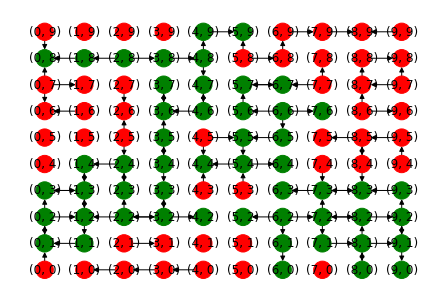

In [88]:
initialNodes=greedyCascadeInitialNodes(gg,4)

print("initial",initialNodes)
res=independantCascadeModel(gg,initialNodes,prob=1,maxrounds=99999)
drawLattice(gg)
#showDiffusion(res)


Neben dem diskutierten ICM wird häufig das so genannte <b>Linear Threshhold Model</b> untersucht. Während beim ersten ein bereits aktivierter Knoten seine Nachbarn aktiviert, orientiert sich beim zweiten ein Knoten an allen Nachbarn und wird aktiviert, wenn der Einfluss dieser groß genug wird. In diesem Modell besitzt jeder Nachbar w einen Einfluss $b_{wv}$ auf den Knoten v. Die Summe $\sum_{w\in N_v} b_{wv}$aller Einflüsse der Nachbarn auf v ist dabei höchstens 1. Ein Knoten v wird aktiviert, wenn die Summe der Einflüsse der aktiven Nachbarn einen zufällig gewählten, zwischen 0 und 1 liegenden Schwellwert $\theta_v$ erreicht. M.a.W: v wird aktiviert, wenn $\sum_{w\in N_v^a} b_{wv} \geq \theta_v$, wobei $N_v^a$ die aktivierten Nachbarn von v bezeichnet. Die Aktivierung erfolgt rundenbasiert mit zufällig gewählter Startmenge $A_0$. 

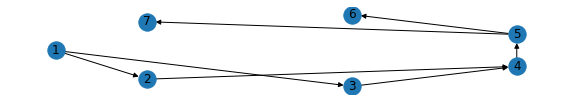

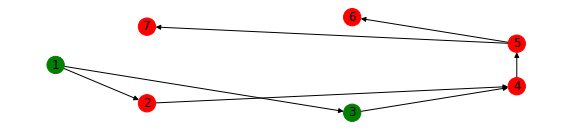

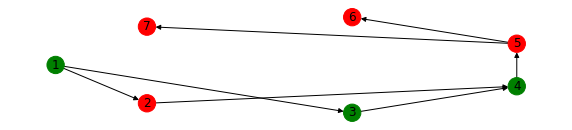

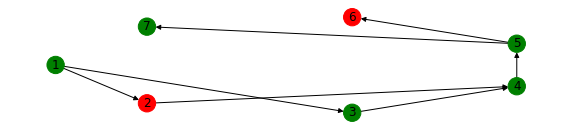

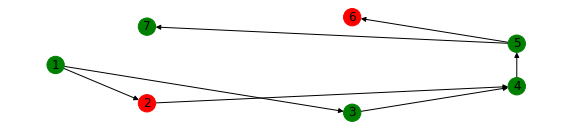

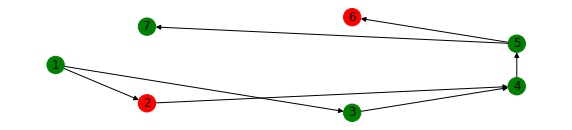

In [15]:
import random as random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def drawActivation(g,nodes,i):
    color_map=[]
    for node in g.nodes:
        if node not in nodes:
            color_map.append('red')
        else:
            color_map.append('green')
    plt.figure(figsize=(10, 20))
    plt.subplot(8,1,i)
    nx.draw_shell(g,with_labels=True,node_color = color_map)


def linearThresholdModel(g,initialNodes,maxrounds=99999):
    active=[]
    inactive=[]
    for v in g.nodes:
        if v in initialNodes:
            active.append(v)
        else:
            inactive.append(v)
    i=0;
    anew=[]
    while (i==0 or anew!=active) and i<maxrounds:
        anew=active[:]
        for v in inactive:
            sumNeighbours=0
            for w in g.predecessors(v):
                if w in active:
                    e=g.edges[(w,v)]
                    sumNeighbours+=e['weight']
            if sumNeighbours>g.nodes[v]['threshold']:
                        active.append(v)
                        inactive.remove(v)
        i=i+1
    return active;
    
    

g=nx.DiGraph();
for i in range(1,7):
    g.add_node(i)
g.add_edges_from([(1,2),(1,3),(2,4),(3,4),(4,5),(5,6),(5,7)])
threshold={1 : 1, 2 : 0.8 , 3 : 0.7 , 4 : 0.09, 5 : 0.4, 6 : 0.8, 7 : 0.3}
nx.set_node_attributes(g,  threshold, 'threshold')
wght={(1,2) : 0.5, (1,3) : 0.8, (2,4) : 0.2,(3,4) : 0.1 ,(4,5) : 0.6,(5,6) : 0.3,(5,7) : 0.9}
nx.set_edge_attributes(g, wght, 'weight')
plt.figure(figsize=(10, 15))
plt.subplot(8,1,1)
nx.draw_shell(g,with_labels=True)
for i in range(1,6):
    result=linearThresholdModel(g,[list(g.nodes())[0]],maxrounds=i)
    drawActivation(g,result,i+1)                  
plt.show()

[(0, 0), (0, 1), (1, 0), (1, 1)]


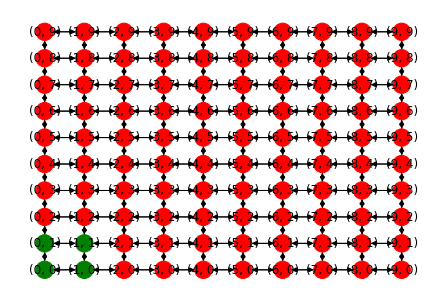

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
n=10

def drawLatticeActivation(g,nodes):
    color_map=[]
    for node in g.nodes:
        if node not in nodes:
            color_map.append('red')
        else:
            color_map.append('green') 
    pos = dict( (n, n) for n in g.nodes() )
    nx.draw(g, pos=pos, labels=pos,node_color=color_map)
    
g2d=nx.grid_2d_graph(n, n, periodic=False, create_using=nx.DiGraph())

thresholds={}
# Threshold-Wert der Knoten stehen in den Node-Attributes 
for v in g2d.nodes:
    w={v : random.random()}
    thresholds.update(w)
nx.set_node_attributes(g2d,  thresholds, 'threshold')
wght={}
for e in g2d.edges:
    w={e : random.random()}
    wght.update(w)
nx.set_edge_attributes(g2d, wght, 'weight')


result=linearThresholdModel(g2d,[list(g2d.nodes())[0]],maxrounds=15)
drawLatticeActivation(g2d,result)

print(result)

Kempe, Tardös und Kleinberg haben im oben genannten Papier gezeigt, dass das influence maximization problem auch für LTM NP-hart ist. Die Argumentation erfolgt analog zu oben. 

Was passiert, wenn die Aktivierung nach einer vorzugebenden Anzahl an Schritten erlischt? Wie sieht es aus, wenn die erloschene Aktivierung wieder aktiviert werden kann und wie, wenn nicht?
Idee: Wir schreiben die Information, in welchem Zeitschritt ein Knoten wieder deaktiviert wird in ein Knotenattribut, das in jeder folgenden Iteration dekrementiert wird. Wird dieses Attribut 0, so wir die Aktivierung entweder wieder 0 und eine erneute Aktivierung wird möglich, oder das Attribut wird zu 2 und der Knoten bleibt danach deaktivert. Dafür wird die Dauer t zur aktuellen Runde i addiert in den Knoten geschrieben und zu Beginn der While-Schleife überprüft. 

In [18]:
def initDTime(g,initalNodes,dTime):
    times={}
    for v in g.nodes:
        if v in initialNodes:
            time={v : dTime}
        else:
            time={v : 0}
        times.update(time)
    nx.set_node_attributes(g, times, 'activationTime')

def updateDTime(g,status):
    times={}
    deactivated=[]
    for v in g.nodes():
        if g.nodes[v]['activationTime']>0:
            newtime=g.nodes[v]['activationTime']-1
            time={v : newtime}
            if newtime==0:
                deactivated.append(v)
                deactivate(g,v,status)
        else:
            time={v : 0}
        times.update(time)
    nx.set_node_attributes(g, times, 'activationTime')
    return deactivated

def setDTime(g,dTime,v):
    times={}
    for w in g.nodes():
        time=g.nodes[w]['activationTime']-1
        time={w : time}
        times.update(time)
    times={v : dTime}
    times.update(time)
    nx.set_node_attributes(g, times, 'activationTime')

def deactivate(g,w,status):
    ww={w : 0}
    status.update(ww)
    nx.set_node_attributes(g, status, 'activation')    

def independantCascadeModelTimed(g,initialNodes,maxrounds=99999,prob=0.5,dTime=0):
    status={}
    for v in g.nodes:
        if v in initialNodes:
            w={v : 1}
        else:
            w={v : 0}
        status.update(w)
    nx.set_node_attributes(g, status, 'activation')
    if (dTime>0):
        initDTime(g,initialNodes,dTime)
    i=0;
    a=[]
    # Ist das wirklich richtig?
    a_all=initialNodes.copy()
    a.append(initialNodes);
    deact=[]
    deactivated=[]
    while a[i]:
        if dTime>0 and i>0: 
            deactivated=updateDTime(g,status)
        anew=[]
        for v in a[i]:
            if v not in deactivated:
                for w in nx.neighbors(g,v):
                    if w not in a_all:
                        p=random.random()
                        if p<=getProbability(g,prob,v,w):
                            activate(g,w,status)
                        if dTime>0:
                            setDTime(g,dTime,w)
                        anew.append(w)
                        a_all.append(w)
        i+=1
        a.append(anew)
        if i>maxrounds:
            return a
        deact.append(deactivated)
    return a, deact;

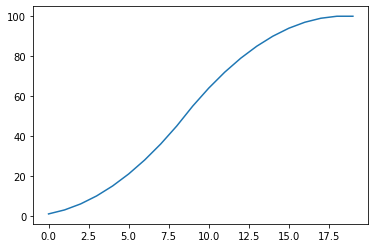

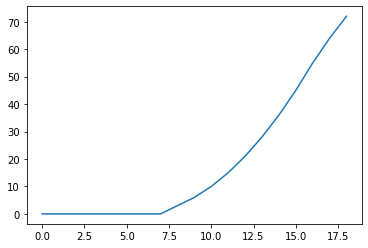

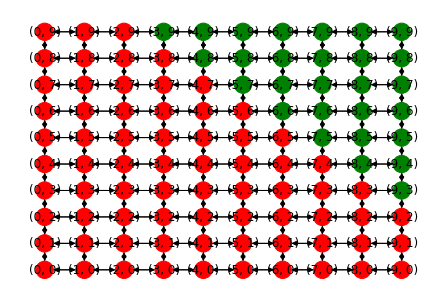

In [26]:
g=nx.grid_2d_graph(10, 10, periodic=False, create_using=nx.DiGraph())
initialNodes=[list(g.nodes())[0]]
res,res2=independantCascadeModelTimed(g,initialNodes,maxrounds=20,prob=1,dTime=8)
showDiffusion(res)
showDiffusion(res2)
drawLattice(g)
